In [5]:
from pulse2percept.stimuli.images import ImageStimulus
stim = ImageStimulus("D:/Projects/GP/pulse2percept/pulse2percept/apple.jpg")

In [6]:
import pulse2percept as p2p
import numpy as np
import matplotlib.pyplot as plt

## Image preprocessing

<Axes: >

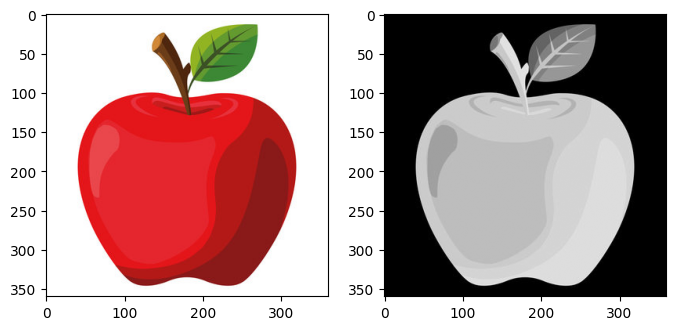

In [7]:
stim_gray = stim.invert().rgb2gray()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
stim.plot(ax=ax1)
stim_gray.plot(ax=ax2)

<Axes: >

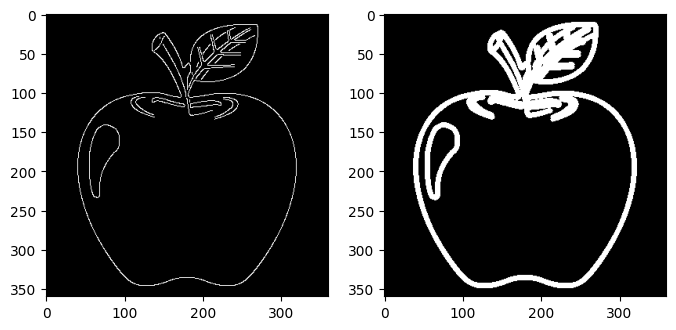

In [16]:
from skimage.morphology import dilation, disk

stim_edge = stim_gray.filter('canny')
stim_dilate = stim_edge.apply(lambda x: dilation(x, disk(3)))  # radius = 3

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
# Edges extracted with the Scharr operator:
stim_edge.plot(ax=ax1)
# Edges thickened with dilation:
stim_dilate.plot(ax=ax2)

## Model and Implant setup

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

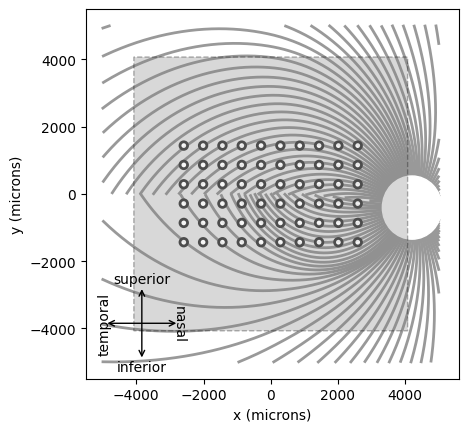

In [ ]:
# Simulate only what we need (14x14 deg sampled at 0.1 deg):
model = p2p.models.AxonMapModel()
model.build()

from pulse2percept.implants import PRIMA
implant = PRIMA()

# Show the visual field we're simulating (dashed lines) atop the implant:
model.plot()
implant.plot()

<Axes: xlabel='x (degrees of visual angle)', ylabel='y (degrees of visual angle)'>

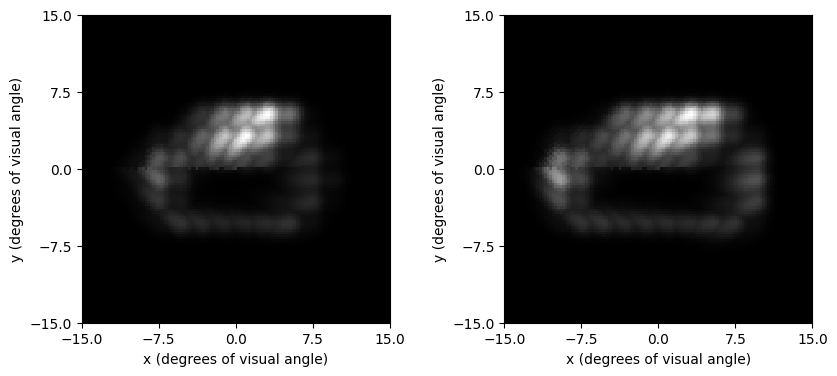

In [35]:
implant.stim = stim_edge.resize(implant.shape)
percept_edge = model.predict_percept(implant)

implant.stim = stim_dilate.trim().resize(implant.shape)
percept_dilate = model.predict_percept(implant)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
percept_edge.plot(ax=ax1)
percept_dilate.plot(ax=ax2)

In [36]:
stim = stim_edge.trim().resize(implant.shape)
# stim_corpped = stim[:387, 1]
# print(stim_corpped.shape)
# implant.stim = stim.encode()

## The whole Experiment

In [45]:
model = p2p.models.Model(spatial=p2p.models.BiphasicAxonMapSpatial,
                         temporal=p2p.models.Nanduri2012Temporal)

In [46]:
model.build(xrange=(-7, 7), yrange=(-7, 7), xystep=0.1)

Model(asymptote=14.0, ax_segments_range=(0, 50), 
      axlambda=500, axon_pickle='axons.pickle', 
      axons_range=(-180, 180), 
      bright_model=DefaultBrightModel, dt=0.005, 
      engine=None, eps=8.73, eye='RE', 
      grid_type='rectangular', ignore_pickle=False, 
      loc_od=(15.5, 1.5), min_ax_sensitivity=0.001, 
      n_ax_segments=500, n_axons=1000, n_gray=None, 
      n_jobs=1, n_threads=4, ndim=[2], noise=None, rho=200, 
      scale_out=1.0, scheduler='threading', shift=16.0, 
      size_model=DefaultSizeModel, slope=3.0, 
      spatial=BiphasicAxonMapSpatial, 
      streak_model=DefaultStreakModel, tau1=0.42, 
      tau2=45.25, tau3=26.25, temporal=Nanduri2012Temporal, 
      thresh_percept=0, verbose=True, 
      vfmap=Watson2014Map(ndim=2), xrange=(-7, 7), 
      xystep=0.1, yrange=(-7, 7))

In [ ]:
percept = model.predict_percept(implant)

TypeError: All stimuli must be BiphasicPulseTrains with no delay dur

<Axes: xlabel='x (degrees of visual angle)', ylabel='y (degrees of visual angle)'>

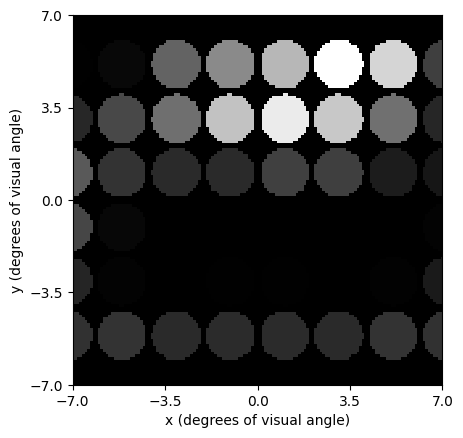

In [44]:
percept.plot()